# VLSP 2025 MLQA-TSR Dataset - Exploratory Data Analysis

This notebook provides a comprehensive exploratory data analysis (EDA) of the VLSP 2025 MLQA-TSR (Multi-modal Law Question Answering for Traffic Sign Recognition) dataset. 

## Dataset Overview
The dataset consists of:
- **Law Database**: Two Vietnamese traffic laws with articles containing images and tables
  - Quy chuẩn kỹ thuật quốc gia về báo hiệu đường bộ (QCVN 41:2024/BGTVT)
  - Luật trật tự giao thông đường bộ (36/2024/QH15)
- **Training Data**: Questions and answers related to traffic signs with associated images
- **Images**: Traffic sign images referenced in questions

The goal is to understand the structure, distribution, and characteristics of this Vietnamese traffic sign recognition dataset.

## 1. Import Required Libraries

In [4]:
!pip install plotly
!pip install wordcloud

In [5]:
# Data manipulation and analysis
import pandas as pd
import numpy as np
import json
import os
from collections import Counter, defaultdict

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Text processing
import re
from wordcloud import WordCloud

# Image processing (for potential image analysis)
from PIL import Image
import zipfile

# Set visualization styles
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 100)

print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!


In [10]:
%cd ~
%cd /home/VLSP/notebook

/root
/home/VLSP/notebook


## 2. Load Dataset

In [13]:
# Define paths
data_dir = "/home/VLSP/data/VLSP 2025 - MLQA-TSR Data Release"
train_json_path = os.path.join(data_dir, "train_data/vlsp_2025_train.json")
law_json_path = os.path.join(data_dir, "law_db/vlsp2025_law.json")

# Load training data
print("Loading training data...")
with open(train_json_path, 'r', encoding='utf-8') as f:
    train_data = json.load(f)

# Load law database
print("Loading law database...")
with open(law_json_path, 'r', encoding='utf-8') as f:
    law_data = json.load(f)

# Convert training data to DataFrame for easier analysis
train_df = pd.DataFrame(train_data)

print(f"✅ Training data loaded: {len(train_data)} samples")
print(f"✅ Law database loaded: {len(law_data)} legal documents")
print(f"✅ DataFrame shape: {train_df.shape}")

# Display basic info
print("\n" + "="*50)
print("DATASET OVERVIEW")
print("="*50)
print(f"Training samples: {len(train_data):,}")
print(f"Legal documents: {len(law_data):,}")
print(f"DataFrame columns: {list(train_df.columns)}")

Loading training data...
Loading law database...
✅ Training data loaded: 530 samples
✅ Law database loaded: 2 legal documents
✅ DataFrame shape: (530, 7)

DATASET OVERVIEW
Training samples: 530
Legal documents: 2
DataFrame columns: ['id', 'image_id', 'question', 'relevant_articles', 'question_type', 'choices', 'answer']


## 3. Data Preview and Structure Analysis

In [14]:
# Display basic DataFrame info
print("TRAINING DATA STRUCTURE")
print("="*40)
print(train_df.info())
print("\n" + "="*40)
print("SAMPLE DATA")
print("="*40)

# Display first few samples
for i, sample in enumerate(train_data[:3]):
    print(f"\n📋 SAMPLE {i+1}:")
    print(f"ID: {sample['id']}")
    print(f"Image ID: {sample['image_id']}")
    print(f"Question Type: {sample['question_type']}")
    print(f"Question: {sample['question'][:100]}...")
    print(f"Answer: {sample['answer']}")
    if 'choices' in sample:
        print("Choices:")
        for key, value in sample['choices'].items():
            print(f"  {key}: {value[:60]}...")
    print(f"Relevant Articles: {sample['relevant_articles']}")
    print("-" * 60)

# Check for missing values
print("\n" + "="*40)
print("MISSING VALUES ANALYSIS")
print("="*40)
missing_counts = train_df.isnull().sum()
print(missing_counts)

# Data types
print("\n" + "="*40)
print("DATA TYPES")
print("="*40)
print(train_df.dtypes)

TRAINING DATA STRUCTURE
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530 entries, 0 to 529
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 530 non-null    object
 1   image_id           530 non-null    object
 2   question           530 non-null    object
 3   relevant_articles  530 non-null    object
 4   question_type      530 non-null    object
 5   choices            376 non-null    object
 6   answer             530 non-null    object
dtypes: object(7)
memory usage: 29.1+ KB
None

SAMPLE DATA

📋 SAMPLE 1:
ID: train_1
Image ID: train_1_3
Question Type: Multiple choice
Question: Biển báo cấm xe khách trên 29 chỗ được áp dụng trong các khoảng thời gian nào? ...
Answer: B
Choices:
  A: Từ 6:30 đến 8:00 và từ 16:30 đến 18:30; ngoài các khoảng thờ...
  B: Từ 6:30 đến 8:00 và từ 16:30 đến 18:30; ngoài các khoảng thờ...
  C: Cấm lưu thông cả ngày....
  D: D. Không cấm xe khách trên 2

## 4. Question Types Distribution Analysis

QUESTION TYPES DISTRIBUTION
Multiple choice: 376 samples (70.9%)
Yes/No: 154 samples (29.1%)


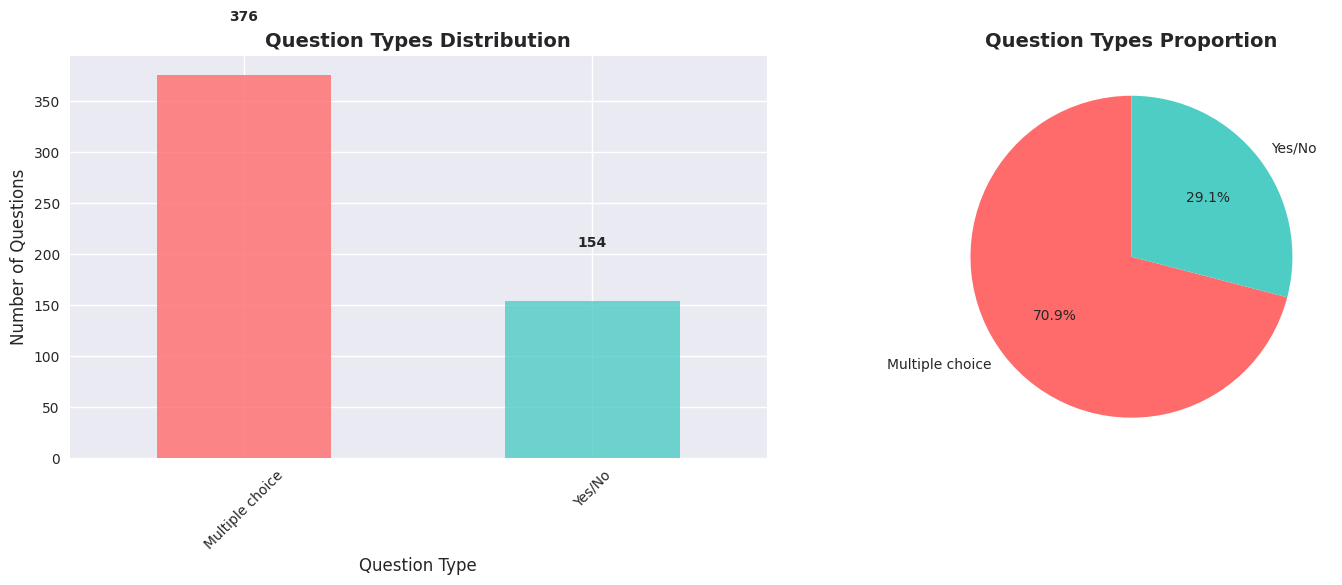

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [15]:
# Analyze question types
question_types = train_df['question_type'].value_counts()
question_types_pct = train_df['question_type'].value_counts(normalize=True) * 100

print("QUESTION TYPES DISTRIBUTION")
print("="*40)
for qtype, count in question_types.items():
    pct = question_types_pct[qtype]
    print(f"{qtype}: {count:,} samples ({pct:.1f}%)")

# Create visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Bar plot
question_types.plot(kind='bar', ax=ax1, color=['#FF6B6B', '#4ECDC4'], alpha=0.8)
ax1.set_title('Question Types Distribution', fontsize=14, fontweight='bold')
ax1.set_xlabel('Question Type', fontsize=12)
ax1.set_ylabel('Number of Questions', fontsize=12)
ax1.tick_params(axis='x', rotation=45)

# Add value labels on bars
for i, v in enumerate(question_types.values):
    ax1.text(i, v + 50, str(v), ha='center', va='bottom', fontweight='bold')

# Pie chart
ax2.pie(question_types.values, labels=question_types.index, autopct='%1.1f%%', 
        colors=['#FF6B6B', '#4ECDC4'], startangle=90)
ax2.set_title('Question Types Proportion', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# Interactive plot with Plotly
fig_plotly = px.pie(values=question_types.values, names=question_types.index,
                    title="Question Types Distribution (Interactive)",
                    color_discrete_sequence=['#FF6B6B', '#4ECDC4'])
fig_plotly.update_traces(textposition='inside', textinfo='percent+label')
fig_plotly.show()

## 5. Answer Distribution Analysis

OVERALL ANSWER DISTRIBUTION
A: 114 (21.5%)
B: 103 (19.4%)
C: 84 (15.8%)
Sai: 79 (14.9%)
D: 74 (14.0%)
Đúng: 60 (11.3%)
Đúng: 15 (2.8%)
40: 1 (0.2%)


TypeError: 'value' must be an instance of str or bytes, not a int

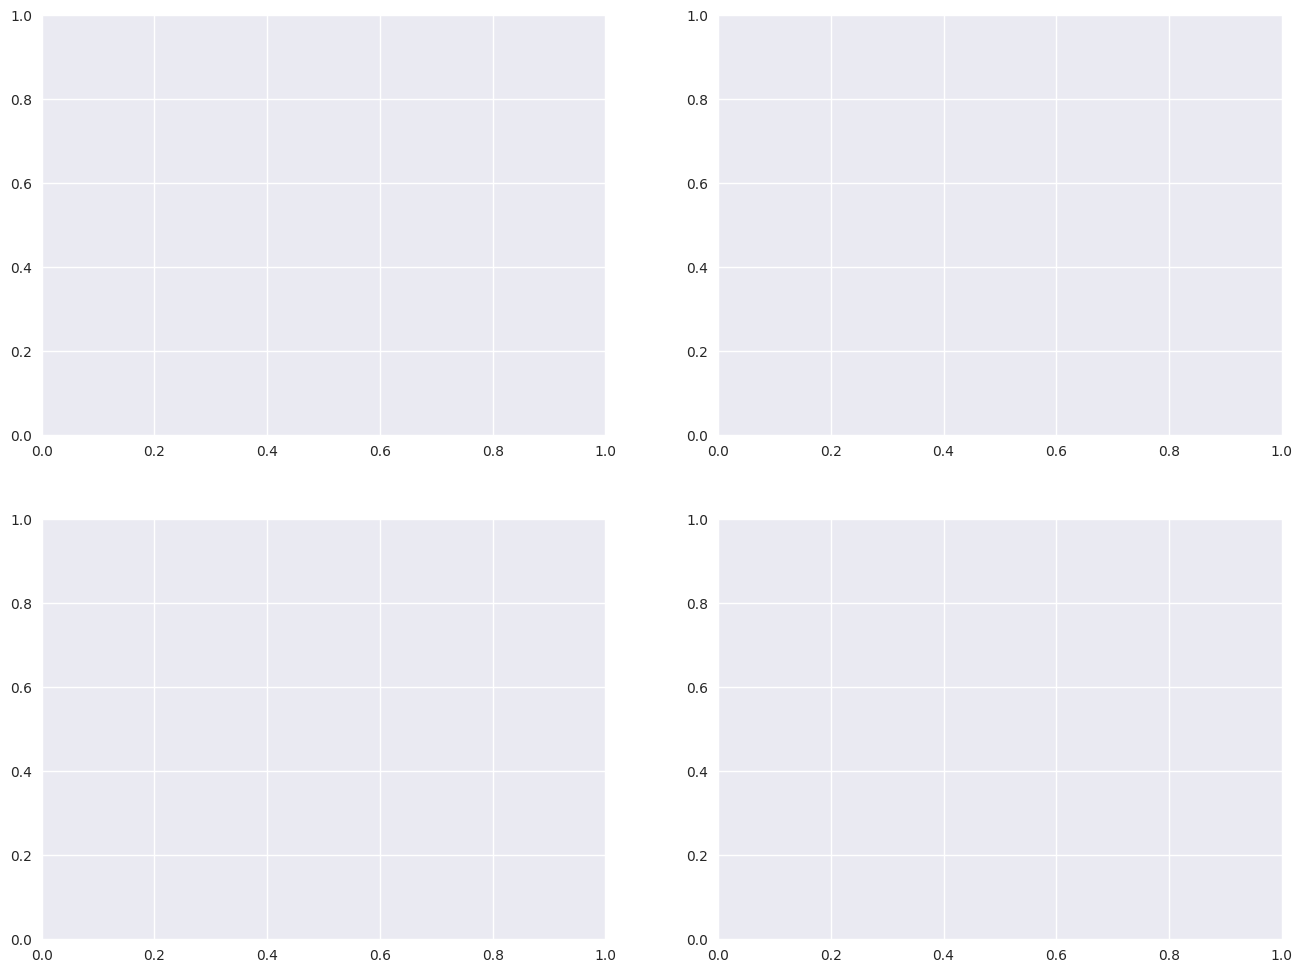

In [16]:
# Overall answer distribution
all_answers = train_df['answer'].value_counts()
print("OVERALL ANSWER DISTRIBUTION")
print("="*40)
for answer, count in all_answers.items():
    pct = (count / len(train_df)) * 100
    print(f"{answer}: {count:,} ({pct:.1f}%)")

# Separate analysis by question type
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Multiple Choice answers
mc_df = train_df[train_df['question_type'] == 'Multiple choice']
mc_answers = mc_df['answer'].value_counts()

axes[0,0].bar(mc_answers.index, mc_answers.values, color='#FF6B6B', alpha=0.7)
axes[0,0].set_title('Multiple Choice Answers Distribution', fontweight='bold')
axes[0,0].set_xlabel('Answer Choice')
axes[0,0].set_ylabel('Count')
for i, v in enumerate(mc_answers.values):
    axes[0,0].text(i, v + 10, str(v), ha='center', va='bottom', fontweight='bold')

# Yes/No answers
yn_df = train_df[train_df['question_type'] == 'Yes/No']
yn_answers = yn_df['answer'].value_counts()

axes[0,1].bar(yn_answers.index, yn_answers.values, color='#4ECDC4', alpha=0.7)
axes[0,1].set_title('Yes/No Answers Distribution', fontweight='bold')
axes[0,1].set_xlabel('Answer')
axes[0,1].set_ylabel('Count')
for i, v in enumerate(yn_answers.values):
    axes[0,1].text(i, v + 5, str(v), ha='center', va='bottom', fontweight='bold')

# Overall distribution pie chart
axes[1,0].pie(all_answers.values, labels=all_answers.index, autopct='%1.1f%%',
              colors=plt.cm.Set3(np.linspace(0, 1, len(all_answers))))
axes[1,0].set_title('Overall Answer Distribution', fontweight='bold')

# Question type vs Answer heatmap
crosstab = pd.crosstab(train_df['question_type'], train_df['answer'])
sns.heatmap(crosstab, annot=True, fmt='d', cmap='YlOrRd', ax=axes[1,1])
axes[1,1].set_title('Question Type vs Answer Cross-tabulation', fontweight='bold')

plt.tight_layout()
plt.show()

print("\n" + "="*50)
print("DETAILED BREAKDOWN BY QUESTION TYPE")
print("="*50)

print(f"\n📊 Multiple Choice Questions: {len(mc_df):,}")
for answer, count in mc_answers.items():
    pct = (count / len(mc_df)) * 100
    print(f"  {answer}: {count:,} ({pct:.1f}%)")

print(f"\n📊 Yes/No Questions: {len(yn_df):,}")
for answer, count in yn_answers.items():
    pct = (count / len(yn_df)) * 100
    print(f"  {answer}: {count:,} ({pct:.1f}%)")

## 6. Relevant Articles Analysis

RELEVANT ARTICLES ANALYSIS
Total article references: 1,223
Unique law IDs: 2
Unique article IDs: 130

📚 LAW DOCUMENTS DISTRIBUTION:
  QCVN 41:2024/BGTVT: 1,214 references (99.3%)
  36/2024/QH15: 9 references (0.7%)

📊 ARTICLES PER QUESTION DISTRIBUTION:
  1 article(s): 78 questions (14.7%)
  2 article(s): 337 questions (63.6%)
  3 article(s): 39 questions (7.4%)
  4 article(s): 48 questions (9.1%)
  5 article(s): 11 questions (2.1%)
  6 article(s): 14 questions (2.6%)
  7 article(s): 1 questions (0.2%)
  8 article(s): 2 questions (0.4%)


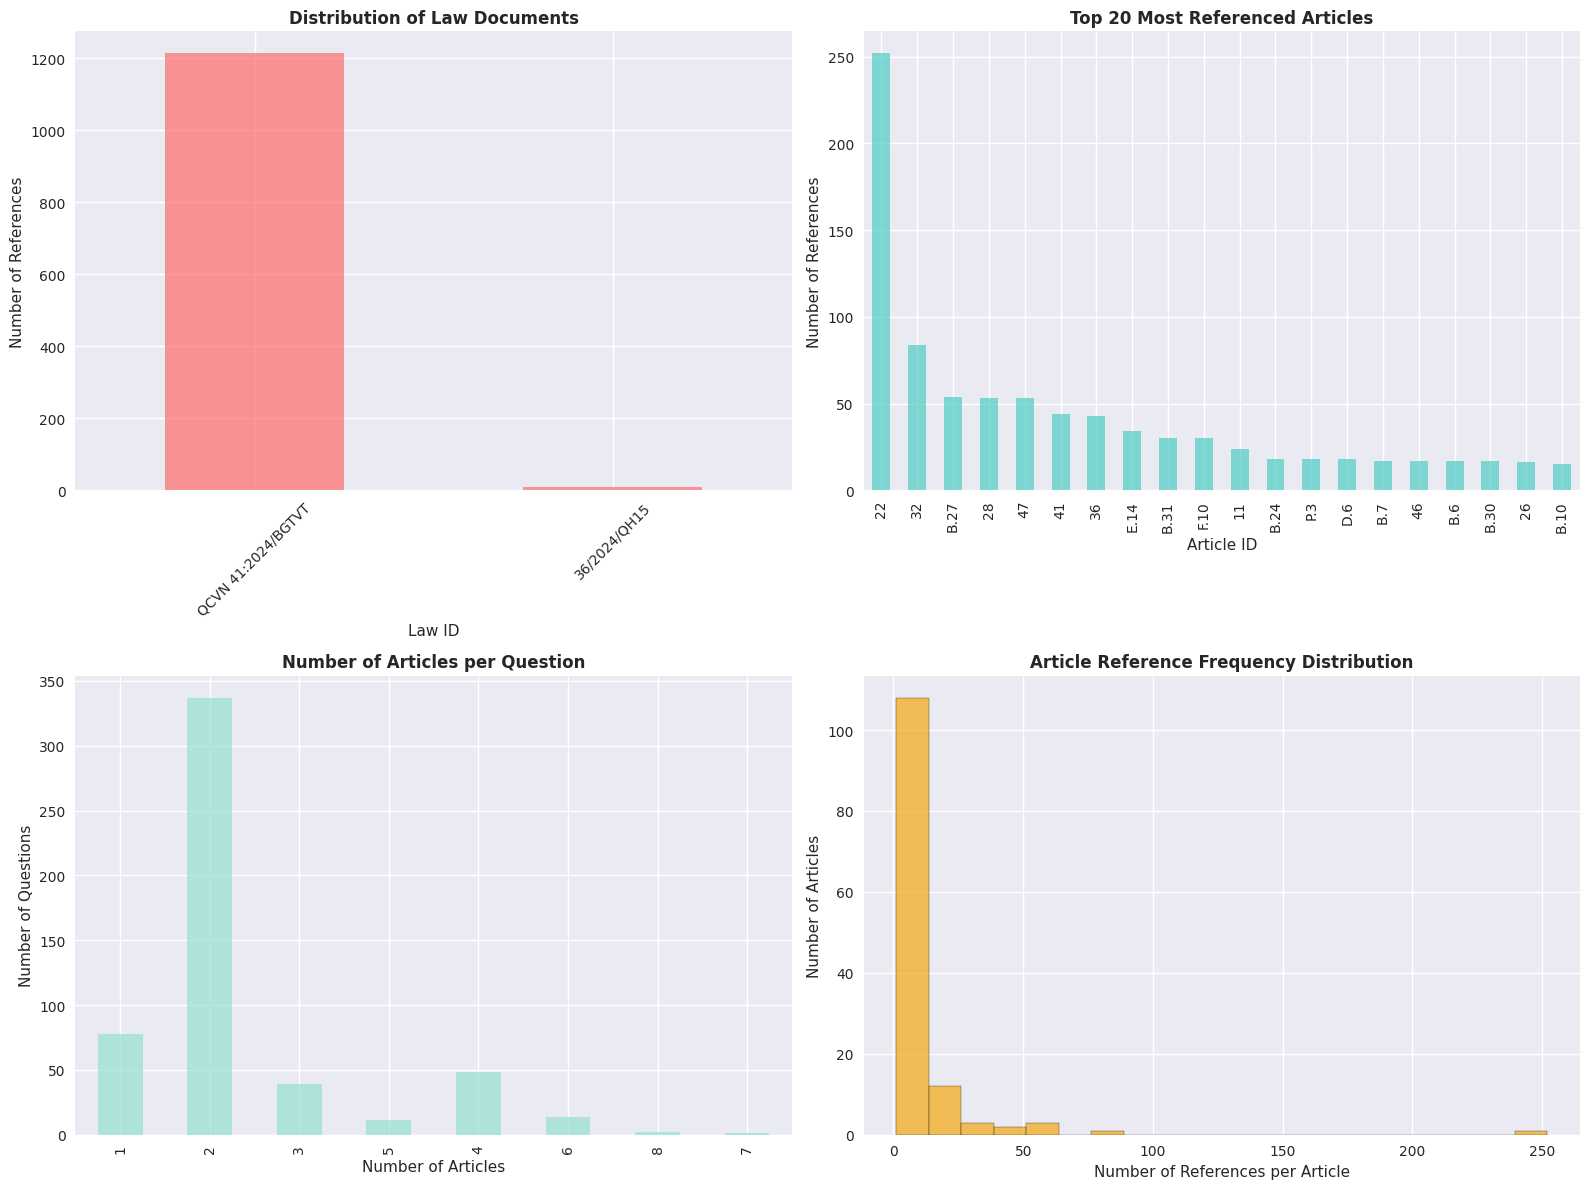


TOP 10 MOST REFERENCED ARTICLES
 1. Article 22: 252 references
 2. Article 32: 84 references
 3. Article B.27: 54 references
 4. Article 28: 53 references
 5. Article 47: 53 references
 6. Article 41: 44 references
 7. Article 36: 43 references
 8. Article E.14: 34 references
 9. Article B.31: 30 references
10. Article F.10: 30 references


In [17]:
# Extract and analyze relevant articles
law_ids = []
article_ids = []
articles_per_question = []

for sample in train_data:
    relevant_articles = sample['relevant_articles']
    articles_per_question.append(len(relevant_articles))
    
    for article in relevant_articles:
        law_ids.append(article['law_id'])
        article_ids.append(article['article_id'])

# Law ID distribution
law_id_counts = Counter(law_ids)
article_id_counts = Counter(article_ids)
articles_per_q_dist = Counter(articles_per_question)

print("RELEVANT ARTICLES ANALYSIS")
print("="*50)
print(f"Total article references: {len(law_ids):,}")
print(f"Unique law IDs: {len(set(law_ids))}")
print(f"Unique article IDs: {len(set(article_ids))}")

print("\n📚 LAW DOCUMENTS DISTRIBUTION:")
for law_id, count in law_id_counts.items():
    pct = (count / len(law_ids)) * 100
    print(f"  {law_id}: {count:,} references ({pct:.1f}%)")

print(f"\n📊 ARTICLES PER QUESTION DISTRIBUTION:")
for num_articles, count in sorted(articles_per_q_dist.items()):
    pct = (count / len(train_data)) * 100
    print(f"  {num_articles} article(s): {count:,} questions ({pct:.1f}%)")

# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Law IDs distribution
law_counts_series = pd.Series(law_id_counts)
law_counts_series.plot(kind='bar', ax=axes[0,0], color='#FF6B6B', alpha=0.7)
axes[0,0].set_title('Distribution of Law Documents', fontweight='bold')
axes[0,0].set_xlabel('Law ID')
axes[0,0].set_ylabel('Number of References')
axes[0,0].tick_params(axis='x', rotation=45)

# Top 20 most referenced articles
top_articles = pd.Series(article_id_counts).nlargest(20)
top_articles.plot(kind='bar', ax=axes[0,1], color='#4ECDC4', alpha=0.7)
axes[0,1].set_title('Top 20 Most Referenced Articles', fontweight='bold')
axes[0,1].set_xlabel('Article ID')
axes[0,1].set_ylabel('Number of References')

# Articles per question distribution
articles_per_q_series = pd.Series(articles_per_q_dist)
articles_per_q_series.plot(kind='bar', ax=axes[1,0], color='#95E1D3', alpha=0.7)
axes[1,0].set_title('Number of Articles per Question', fontweight='bold')
axes[1,0].set_xlabel('Number of Articles')
axes[1,0].set_ylabel('Number of Questions')

# Article frequency histogram
axes[1,1].hist(list(article_id_counts.values()), bins=20, color='#F3A712', alpha=0.7, edgecolor='black')
axes[1,1].set_title('Article Reference Frequency Distribution', fontweight='bold')
axes[1,1].set_xlabel('Number of References per Article')
axes[1,1].set_ylabel('Number of Articles')

plt.tight_layout()
plt.show()

print("\n" + "="*50)
print("TOP 10 MOST REFERENCED ARTICLES")
print("="*50)
for i, (article_id, count) in enumerate(article_id_counts.most_common(10), 1):
    print(f"{i:2d}. Article {article_id}: {count:,} references")

## 7. Image Analysis

IMAGE ANALYSIS
Total questions: 530
Unique images: 304
Questions per image (avg): 1.74

📊 IMAGE USAGE STATISTICS:
  Images used only once: 176
  Images used multiple times: 128
  Max questions per image: 11
  Min questions per image: 1

🔍 IMAGE ID PATTERNS:
  Images starting with 'train': 530


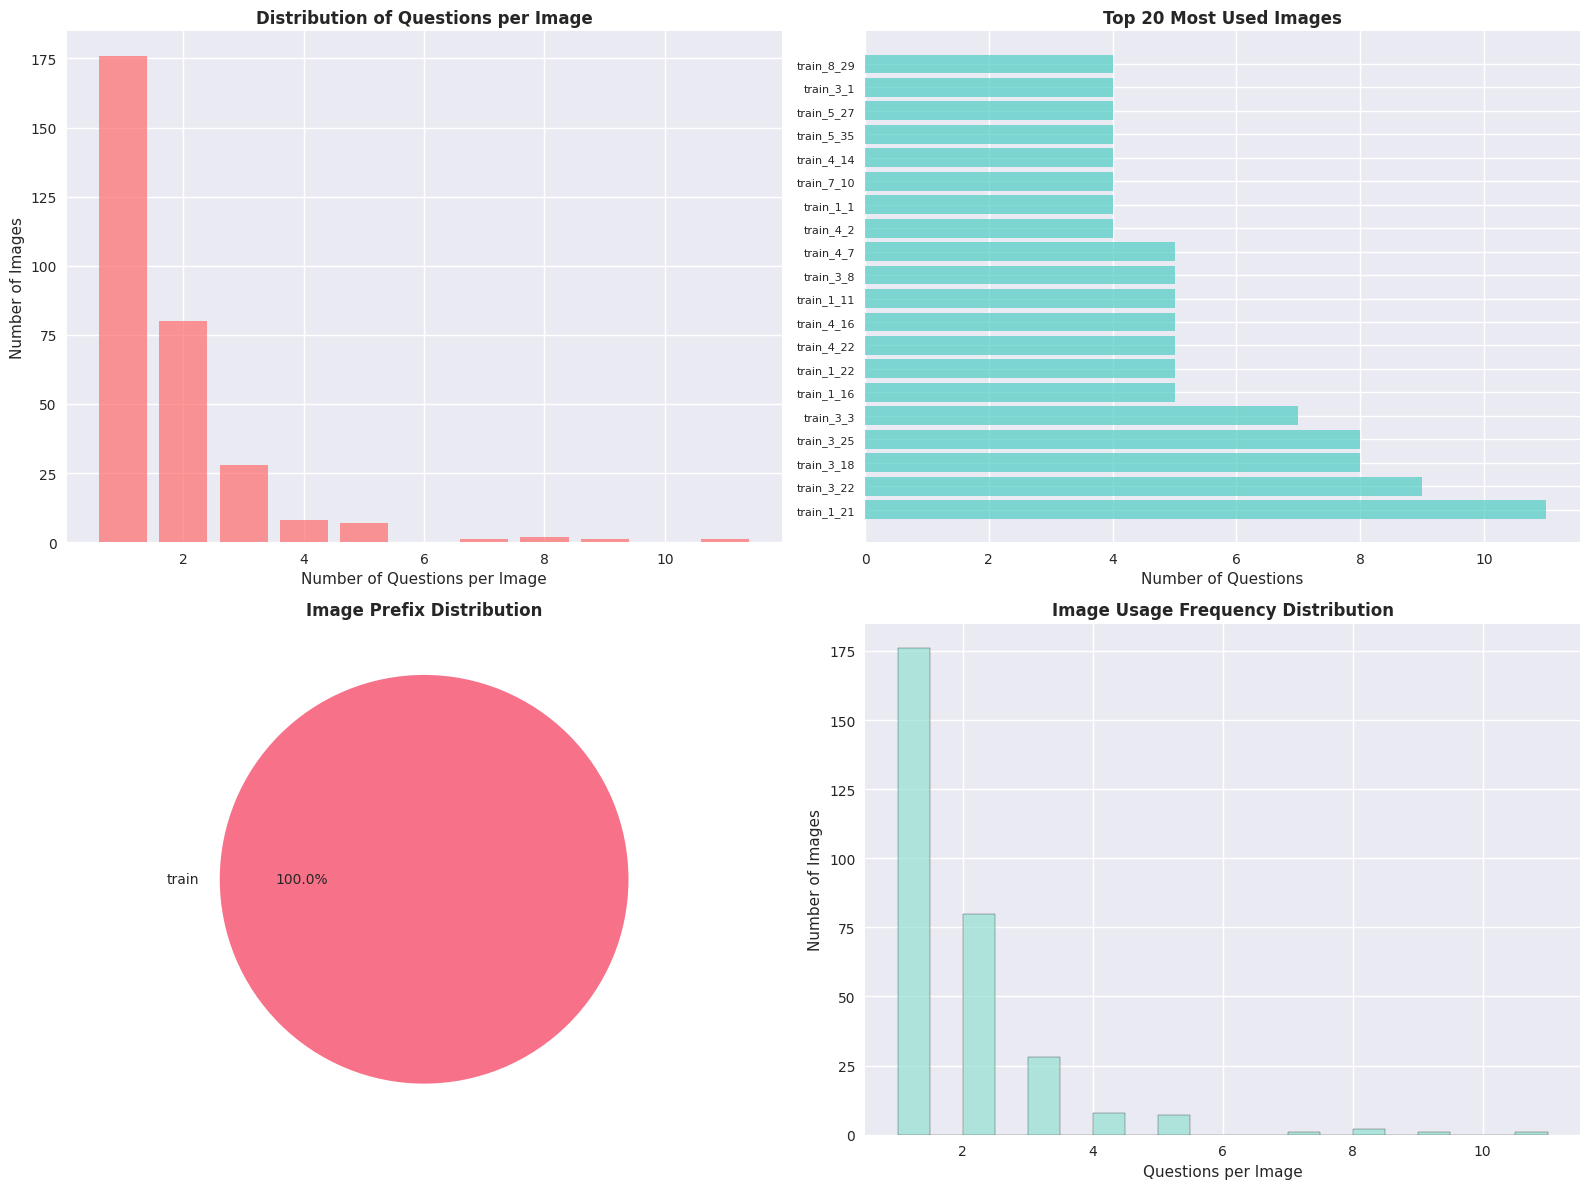


📁 Image archive found: /home/VLSP/data/VLSP 2025 - MLQA-TSR Data Release/train_data/train_images.zip
  Number of image files in archive: 609
  Sample image files: ['train_images/', 'train_images/train_4_12.jpg', '__MACOSX/train_images/._train_4_12.jpg', 'train_images/train_7_43.jpg', '__MACOSX/train_images/._train_7_43.jpg']


In [18]:
# Analyze image IDs and patterns
image_ids = train_df['image_id'].tolist()
unique_images = train_df['image_id'].nunique()
total_questions = len(train_df)

print("IMAGE ANALYSIS")
print("="*40)
print(f"Total questions: {total_questions:,}")
print(f"Unique images: {unique_images:,}")
print(f"Questions per image (avg): {total_questions/unique_images:.2f}")

# Count questions per image
image_usage = train_df['image_id'].value_counts()

print(f"\n📊 IMAGE USAGE STATISTICS:")
print(f"  Images used only once: {sum(image_usage == 1):,}")
print(f"  Images used multiple times: {sum(image_usage > 1):,}")
print(f"  Max questions per image: {image_usage.max()}")
print(f"  Min questions per image: {image_usage.min()}")

# Analyze image ID patterns
print(f"\n🔍 IMAGE ID PATTERNS:")
image_prefixes = [img_id.split('_')[0] for img_id in image_ids]
prefix_counts = Counter(image_prefixes)
for prefix, count in prefix_counts.items():
    print(f"  Images starting with '{prefix}': {count:,}")

# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Image usage distribution
usage_dist = image_usage.value_counts().sort_index()
axes[0,0].bar(usage_dist.index, usage_dist.values, color='#FF6B6B', alpha=0.7)
axes[0,0].set_title('Distribution of Questions per Image', fontweight='bold')
axes[0,0].set_xlabel('Number of Questions per Image')
axes[0,0].set_ylabel('Number of Images')

# Top 20 most used images
top_images = image_usage.head(20)
axes[0,1].barh(range(len(top_images)), top_images.values, color='#4ECDC4', alpha=0.7)
axes[0,1].set_yticks(range(len(top_images)))
axes[0,1].set_yticklabels(top_images.index, fontsize=8)
axes[0,1].set_title('Top 20 Most Used Images', fontweight='bold')
axes[0,1].set_xlabel('Number of Questions')

# Image prefix distribution
prefix_series = pd.Series(prefix_counts)
prefix_series.plot(kind='pie', ax=axes[1,0], autopct='%1.1f%%')
axes[1,0].set_title('Image Prefix Distribution', fontweight='bold')

# Histogram of image usage
axes[1,1].hist(image_usage.values, bins=20, color='#95E1D3', alpha=0.7, edgecolor='black')
axes[1,1].set_title('Image Usage Frequency Distribution', fontweight='bold')
axes[1,1].set_xlabel('Questions per Image')
axes[1,1].set_ylabel('Number of Images')

plt.tight_layout()
plt.show()

# Check if we can access the actual image files
train_images_path = os.path.join(data_dir, "train_data/train_images.zip")
if os.path.exists(train_images_path):
    print(f"\n📁 Image archive found: {train_images_path}")
    with zipfile.ZipFile(train_images_path, 'r') as zip_ref:
        image_files = zip_ref.namelist()
        print(f"  Number of image files in archive: {len(image_files):,}")
        print(f"  Sample image files: {image_files[:5]}")
else:
    print(f"\n❌ Image archive not found at: {train_images_path}")

## 8. Law Database Analysis

LAW DATABASE ANALYSIS

📖 LAW DOCUMENT 1:
  ID: QCVN 41:2024/BGTVT
  Title: QUY CHUẨN KỸ THUẬT QUỐC GIA VỀ BÁO HIỆU ĐƯỜNG BỘ
  Number of articles: 310
  Sample articles:
    Article 1: Phạm vi điều chỉnh
      Text preview: Quy chuẩn này quy định về báo hiệu đường bộ bao gồm: đèn tín hiệu giao thông; biển báo hiệu đường bộ; vạch kẻ đường và các dấu hiệu khác trên mặt đườn...
    Article 2: Đối tượng áp dụng
      Text preview: Quy chuẩn này áp dụng đối với người tham gia giao thông trên mạng lưới đường bộ của Việt Nam và các tổ chức, cá nhân liên quan đến quản lý, đầu tư xây...
    Article 3: Giải thích từ ngữ
      Text preview: Trong Quy chuẩn này, các từ ngữ dưới đây được hiểu như sau: 3.1. Đường đô thị (ĐĐT) là đường trong phạm vi địa giới hành chính nội thành, nội thị, bao...

📖 LAW DOCUMENT 2:
  ID: 36/2024/QH15
  Title: LUẬT TRẬT TỰ, AN TOÀN GIAO THÔNG ĐƯỜNG BỘ
  Number of articles: 89
  Sample articles:
    Article 1: Phạm vi điều chỉnh
      Text preview: Luật này quy định về q

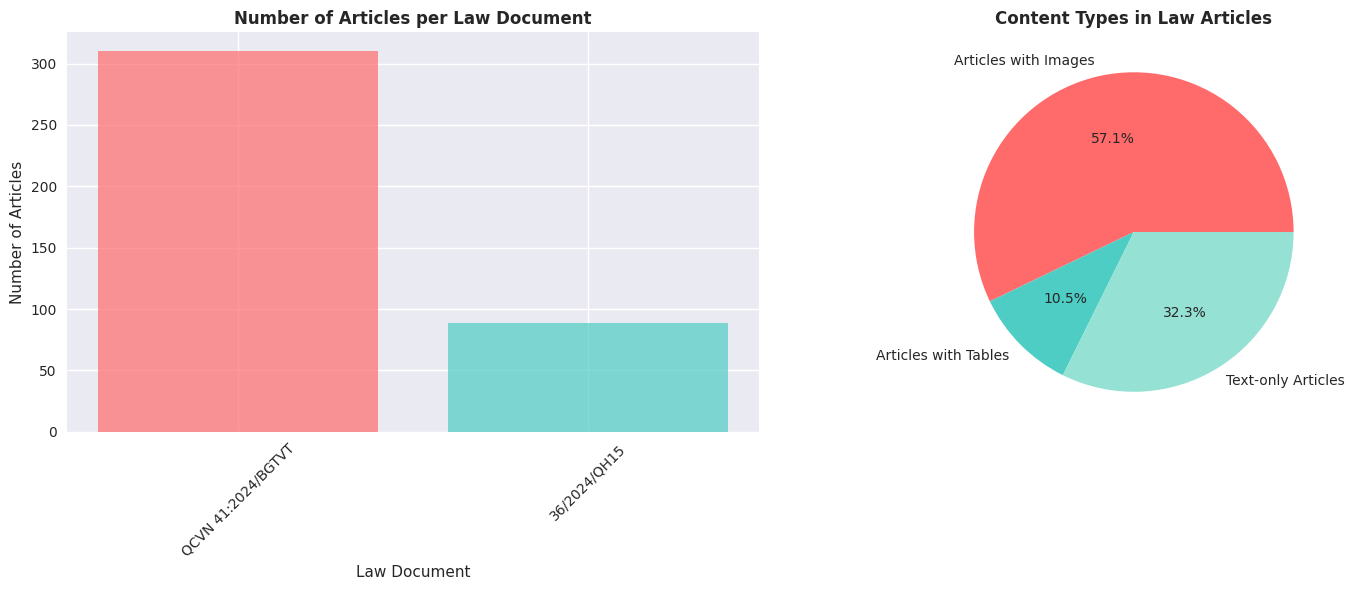

In [19]:
# Analyze law database structure
print("LAW DATABASE ANALYSIS")
print("="*50)

for i, law_doc in enumerate(law_data):
    print(f"\n📖 LAW DOCUMENT {i+1}:")
    print(f"  ID: {law_doc['id']}")
    print(f"  Title: {law_doc['title']}")
    print(f"  Number of articles: {len(law_doc['articles'])}")
    
    # Sample a few articles
    print(f"  Sample articles:")
    for j, article in enumerate(law_doc['articles'][:3]):
        print(f"    Article {article['id']}: {article['title']}")
        text_preview = article['text'][:150].replace('\n', ' ')
        print(f"      Text preview: {text_preview}...")

# Count articles per law
articles_per_law = [len(law_doc['articles']) for law_doc in law_data]
total_articles = sum(articles_per_law)

print(f"\n📊 SUMMARY STATISTICS:")
print(f"  Total legal documents: {len(law_data)}")
print(f"  Total articles: {total_articles:,}")
print(f"  Average articles per document: {np.mean(articles_per_law):.1f}")

# Check for images and tables in law articles
image_count = 0
table_count = 0
articles_with_images = 0
articles_with_tables = 0

for law_doc in law_data:
    for article in law_doc['articles']:
        text = article['text']
        
        # Count images
        images_in_article = len(re.findall(r'<<IMAGE:.*?/IMAGE>>', text))
        if images_in_article > 0:
            articles_with_images += 1
            image_count += images_in_article
            
        # Count tables
        tables_in_article = len(re.findall(r'<<TABLE:.*?/TABLE>>', text, re.DOTALL))
        if tables_in_article > 0:
            articles_with_tables += 1
            table_count += tables_in_article

print(f"\n📊 CONTENT ANALYSIS:")
print(f"  Articles with images: {articles_with_images:,}")
print(f"  Articles with tables: {articles_with_tables:,}")
print(f"  Total embedded images: {image_count:,}")
print(f"  Total embedded tables: {table_count:,}")

# Visualize law structure
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Articles per law document
law_names = [law_doc['id'] for law_doc in law_data]
axes[0].bar(law_names, articles_per_law, color=['#FF6B6B', '#4ECDC4'], alpha=0.7)
axes[0].set_title('Number of Articles per Law Document', fontweight='bold')
axes[0].set_xlabel('Law Document')
axes[0].set_ylabel('Number of Articles')
axes[0].tick_params(axis='x', rotation=45)

# Content types distribution
content_types = ['Articles with Images', 'Articles with Tables', 'Text-only Articles']
content_counts = [articles_with_images, articles_with_tables, 
                  total_articles - articles_with_images - articles_with_tables]

axes[1].pie(content_counts, labels=content_types, autopct='%1.1f%%',
            colors=['#FF6B6B', '#4ECDC4', '#95E1D3'])
axes[1].set_title('Content Types in Law Articles', fontweight='bold')

plt.tight_layout()
plt.show()

## 9. Question and Text Analysis

QUESTION TEXT ANALYSIS
Average question length (characters): 83.7
Average question length (words): 18.8
Shortest question: 19 characters
Longest question: 283 characters

📝 TOP 10 QUESTION STARTERS:
  'Biển báo': 169 questions
  'Đây là': 22 questions
  'Khi gặp': 19 questions
  'Khi tham': 16 questions
  'Theo biển': 15 questions
  'Xe ô': 13 questions
  'Nội dung': 13 questions
  'Người lái': 13 questions
  'Đoạn đường': 9 questions
  'Tốc độ': 8 questions
Non-string choice text found: 70, type: <class 'int'>
Non-string choice text found: 100, type: <class 'int'>
Non-string choice text found: 130, type: <class 'int'>
Non-string choice text found: 110, type: <class 'int'>
Non-string choice text found: 40, type: <class 'int'>
Non-string choice text found: 35, type: <class 'int'>
Non-string choice text found: 45, type: <class 'int'>
Non-string choice text found: 30, type: <class 'int'>
Non-string choice text found: 70, type: <class 'int'>
Non-string choice text found: 100, type: <class 

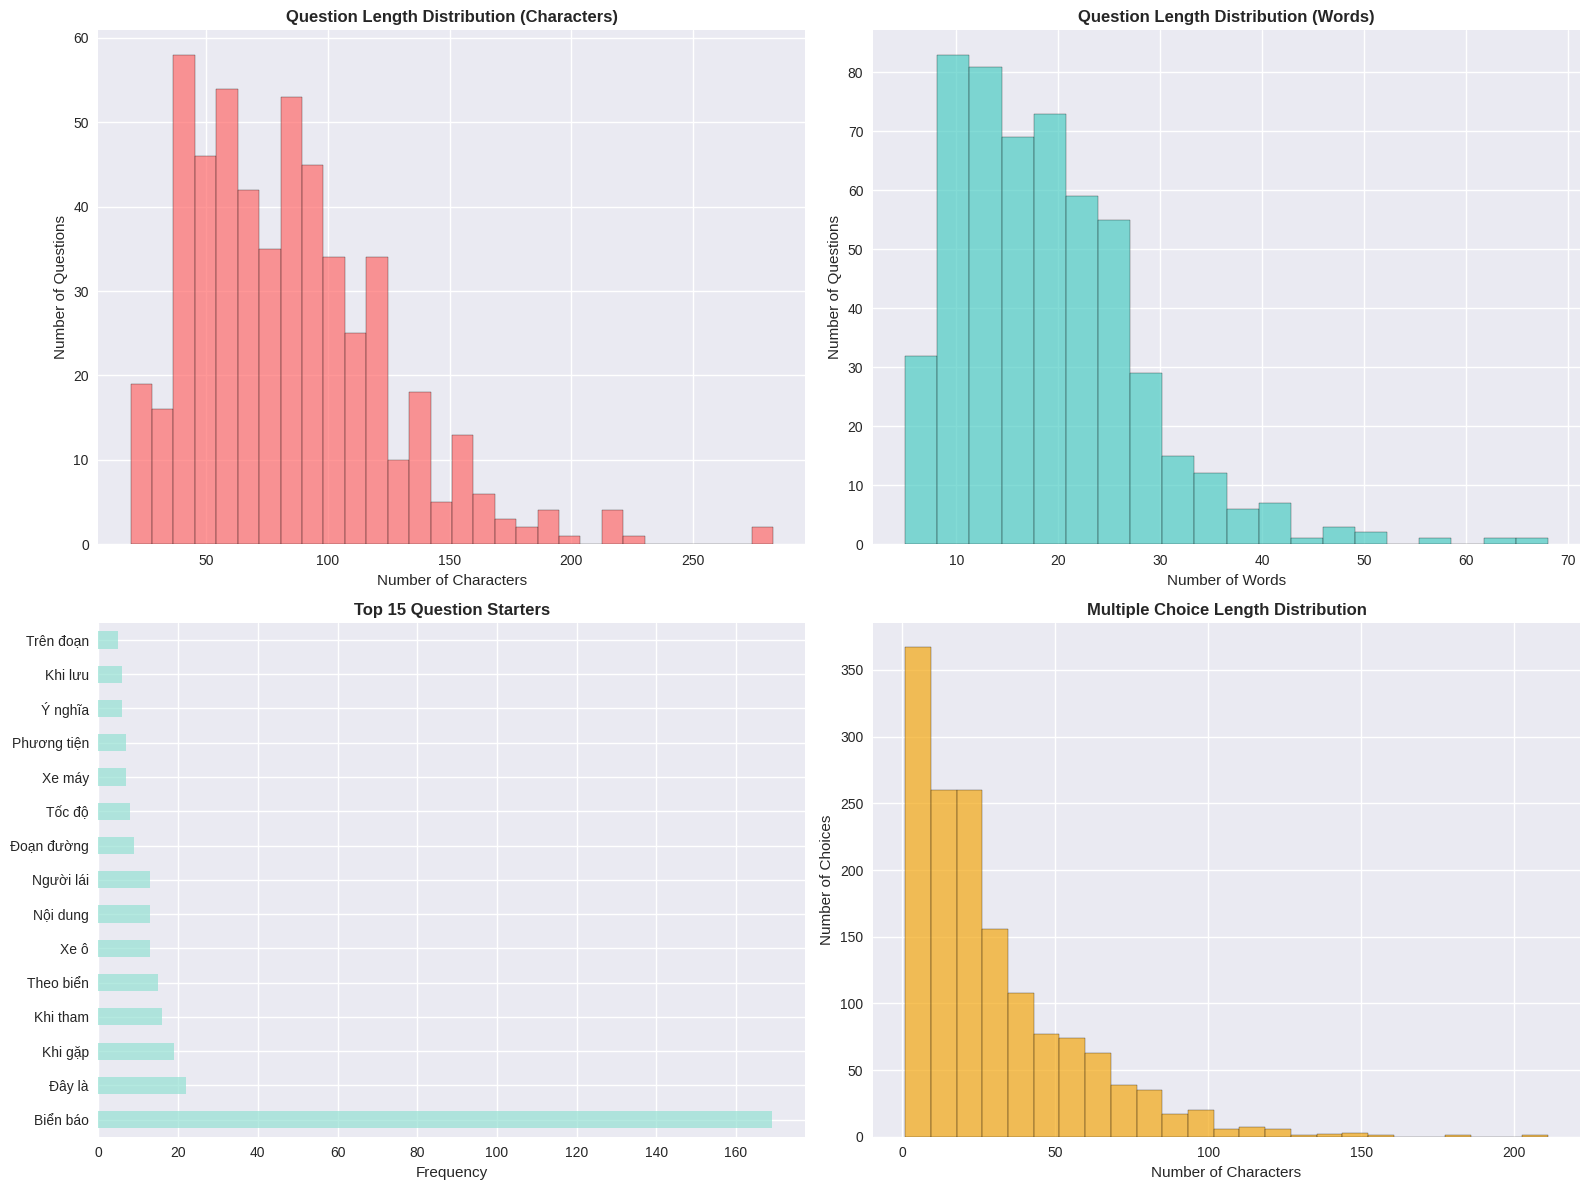


🔍 SAMPLE QUESTIONS:
📝 Shortest questions:
1. Đây là biển báo gì? (19 chars)
2. Đây là biển báo gì? (19 chars)
3. Đây là biển báo gì? (19 chars)

📝 Longest questions:
1. Bạn đang điều khiển xe ô tô đi đến một đoạn đường có biển báo như hình. Phía trước không có đèn tín hiệu giao thông, nhưng có vạch sơn dành cho người đi bộ. Lúc này, có người đang đứng chờ băng qua đư... (224 chars)
2. Khi lưu thông trên đoạn đường cao tốc Bắc - Nam, đoạn Nha Trang - Cam Lâm, bạn thấy biển nền xanh lá cây, nội dung là "Cao tốc Bắc - Nam  Đoạn đường TẬP ĐOÀN SƠN HẢI BẢO HÀNH 10 NĂM", và biển có nội d... (282 chars)
3. Biển báo P.131a (Biển báo cấm đỗ xe từ 6h đến 22h) được đặt ở phía phải của đường hai chiều và không có biển phụ đi kèm. Tài xế xe con A đỗ xe phía đường đối diện, tài xế xe con B đến lúc 21h45, dừng ... (283 chars)


In [12]:
# Analyze question text characteristics
questions = train_df['question'].tolist()
question_lengths = [len(q) for q in questions]
question_word_counts = [len(q.split()) for q in questions]

print("QUESTION TEXT ANALYSIS")
print("="*40)
print(f"Average question length (characters): {np.mean(question_lengths):.1f}")
print(f"Average question length (words): {np.mean(question_word_counts):.1f}")
print(f"Shortest question: {min(question_lengths)} characters")
print(f"Longest question: {max(question_lengths)} characters")

# Find common question patterns/starters
question_starters = []
for q in questions:
    # Get first few words
    words = q.split()
    if len(words) >= 2:
        starter = ' '.join(words[:2])
        question_starters.append(starter)

starter_counts = Counter(question_starters)
print(f"\n📝 TOP 10 QUESTION STARTERS:")
for starter, count in starter_counts.most_common(10):
    print(f"  '{starter}': {count:,} questions")

# Analyze choices for multiple choice questions
mc_questions = train_df[train_df['question_type'] == 'Multiple choice']
choice_lengths = []
choices_text = []

for _, row in mc_questions.iterrows():
    if 'choices' in row and row['choices']:
        for choice_key, choice_text in row['choices'].items():
            if isinstance(choice_text, str):
                choice_text = choice_text.strip()
            else:
                print(f"Non-string choice text found: {choice_text}, type: {type(choice_text)}")
                choice_text = str(choice_text)
            choice_lengths.append(len(choice_text))
            choices_text.append(choice_text)

print(f"\n📊 MULTIPLE CHOICE ANALYSIS:")
print(f"  Total choices: {len(choice_lengths):,}")
print(f"  Average choice length: {np.mean(choice_lengths):.1f} characters")
print(f"  Shortest choice: {min(choice_lengths) if choice_lengths else 0} characters")
print(f"  Longest choice: {max(choice_lengths) if choice_lengths else 0} characters")

# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Question length distribution
axes[0,0].hist(question_lengths, bins=30, color='#FF6B6B', alpha=0.7, edgecolor='black')
axes[0,0].set_title('Question Length Distribution (Characters)', fontweight='bold')
axes[0,0].set_xlabel('Number of Characters')
axes[0,0].set_ylabel('Number of Questions')

# Word count distribution
axes[0,1].hist(question_word_counts, bins=20, color='#4ECDC4', alpha=0.7, edgecolor='black')
axes[0,1].set_title('Question Length Distribution (Words)', fontweight='bold')
axes[0,1].set_xlabel('Number of Words')
axes[0,1].set_ylabel('Number of Questions')

# Top question starters
top_starters = pd.Series(dict(starter_counts.most_common(15)))
top_starters.plot(kind='barh', ax=axes[1,0], color='#95E1D3', alpha=0.7)
axes[1,0].set_title('Top 15 Question Starters', fontweight='bold')
axes[1,0].set_xlabel('Frequency')

# Choice length distribution (if available)
if choice_lengths:
    axes[1,1].hist(choice_lengths, bins=25, color='#F3A712', alpha=0.7, edgecolor='black')
    axes[1,1].set_title('Multiple Choice Length Distribution', fontweight='bold')
    axes[1,1].set_xlabel('Number of Characters')
    axes[1,1].set_ylabel('Number of Choices')

plt.tight_layout()
plt.show()

# Sample some interesting questions
print(f"\n🔍 SAMPLE QUESTIONS:")
print("="*50)
print("📝 Shortest questions:")
shortest_indices = np.argsort(question_lengths)[:3]
for i, idx in enumerate(shortest_indices, 1):
    print(f"{i}. {questions[idx]} ({question_lengths[idx]} chars)")

print("\n📝 Longest questions:")
longest_indices = np.argsort(question_lengths)[-3:]
for i, idx in enumerate(longest_indices, 1):
    q = questions[idx]
    if len(q) > 200:
        q = q[:200] + "..."
    print(f"{i}. {q} ({question_lengths[idx]} chars)")

## 10. Table Data Analysis

TABLE DATA EXTRACTION AND ANALYSIS


/tmp/ipykernel_90709/3333418533.py:30: FutureWarning:

Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.

/tmp/ipykernel_90709/3333418533.py:30: FutureWarning:

Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.

/tmp/ipykernel_90709/3333418533.py:30: FutureWarning:

Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.

/tmp/ipykernel_90709/3333418533.py:30: FutureWarning:

Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.

/tmp/ipykernel_90709/3333418533.py:30: FutureWarning:

Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a

📊 TABLE EXTRACTION RESULTS:
  Articles with tables: 42
  Successfully parsed tables: 212

📐 TABLE DIMENSIONS:
  Average rows per table: 3.4
  Average columns per table: 4.9
  Largest table: 35 rows × 10 columns
  Smallest table: 1 rows × 2 columns

📋 SAMPLE TABLES:

Table 1 (Law: QCVN 41:2024/BGTVT, Article: 12):
Dimensions: 11 rows × 3 columns
Sample data:
                0                                 1        2
0      Loại  biển                        Kích thước  Độ  lớn
1      Biển  tròn  Đường kính ngoài của biển báo, D      700
2      Biển  tròn     Chiều rộng của mép viền đỏ, B      100
3      Biển  tròn         Chiều rộng của vạch đỏ, A       50
4  Biển  bát giác     Đường kính ngoài biển  báo, D      600
--------------------------------------------------

Table 2 (Law: QCVN 41:2024/BGTVT, Article: 12):
Dimensions: 4 rows × 5 columns
Sample data:
                                                                                                                                  

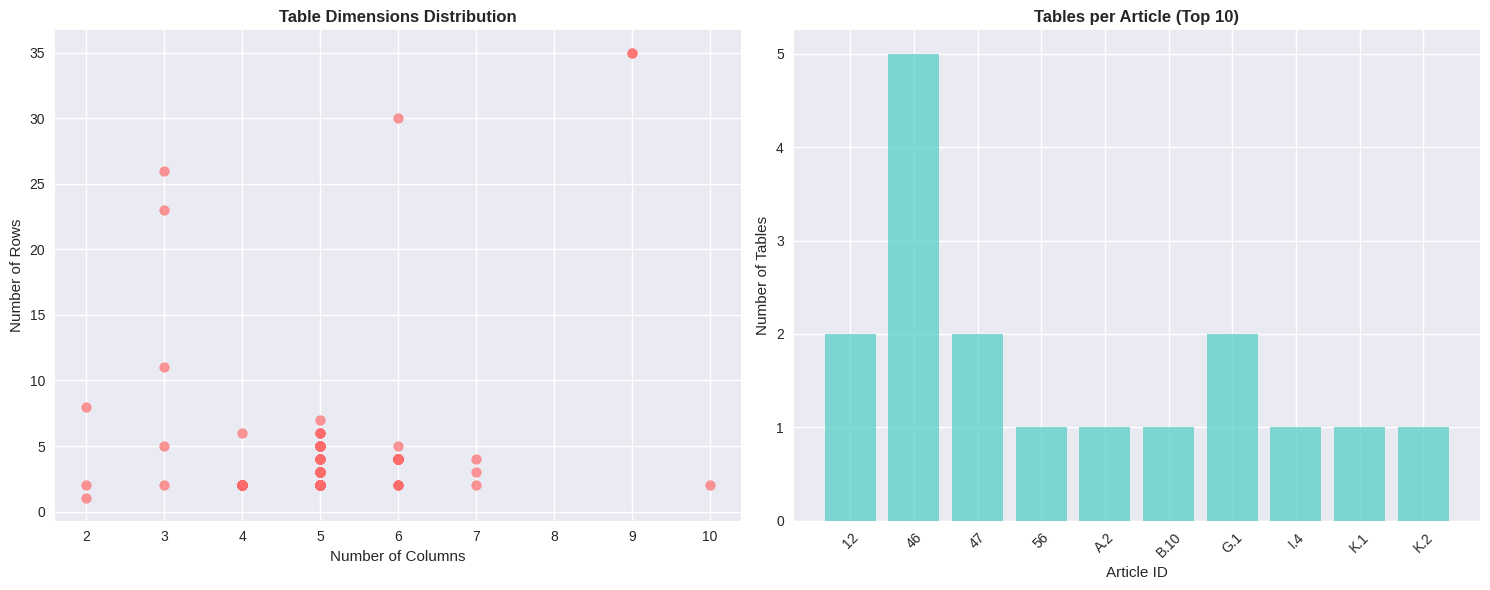


📚 ARTICLES CONTAINING TABLES:
  QCVN 41:2024/BGTVT - Article 12: Kích thước của biển báo... (2 table(s))
  QCVN 41:2024/BGTVT - Article 46: Nội dung biển chỉ dẫn trên đường cao tốc... (5 table(s))
  QCVN 41:2024/BGTVT - Article 47: Các loại biển chỉ dẫn trên đường cao tốc... (2 table(s))
  QCVN 41:2024/BGTVT - Article 56: Tiêu phản quang... (1 table(s))
  QCVN 41:2024/BGTVT - Article A.2: A.2 Một số quy định khi sử dụng hệ thống đèn tín hiệu... (1 table(s))
  QCVN 41:2024/BGTVT - Article B.10: B.10  Biển số P.110a "Cấm xe đạp" và Biển số P.110b"Cấm xe đ... (1 table(s))
  QCVN 41:2024/BGTVT - Article G.1: G.1. Vạch dọc đường... (2 table(s))
  QCVN 41:2024/BGTVT - Article I.4: I.4  Quy định về hình dạng, kích thước và màu sắc đối với cộ... (1 table(s))
  QCVN 41:2024/BGTVT - Article K.1: K.1 Kiểu chữ thường (gt2)... (1 table(s))
  QCVN 41:2024/BGTVT - Article K.2: K.2 Kiểu chữ nén (gt1)... (1 table(s))


In [14]:
# Extract and analyze table data from law documents
print("TABLE DATA EXTRACTION AND ANALYSIS")
print("="*50)

table_data = []
articles_with_tables_detail = []

for law_doc in law_data:
    for article in law_doc['articles']:
        text = article['text']
        
        # Find all tables in this article
        table_matches = re.findall(r'<<TABLE:(.*?)/TABLE>>', text, re.DOTALL)
        
        if table_matches:
            articles_with_tables_detail.append({
                'law_id': law_doc['id'],
                'article_id': article['id'],
                'article_title': article['title'],
                'num_tables': len(table_matches)
            })
            
            for i, table_html in enumerate(table_matches):
                try:
                    # Try to parse the HTML table
                    # Clean up the HTML a bit
                    table_html = table_html.strip()
                    
                    # Use pandas to read HTML table
                    tables = pd.read_html(table_html)
                    
                    for j, df in enumerate(tables):
                        table_data.append({
                            'law_id': law_doc['id'],
                            'article_id': article['id'],
                            'table_index': i,
                            'dataframe_index': j,
                            'rows': len(df),
                            'columns': len(df.columns),
                            'dataframe': df
                        })
                        
                except Exception as e:
                    print(f"⚠️  Could not parse table in {law_doc['id']}, Article {article['id']}: {str(e)[:100]}")

print(f"📊 TABLE EXTRACTION RESULTS:")
print(f"  Articles with tables: {len(articles_with_tables_detail)}")
print(f"  Successfully parsed tables: {len(table_data)}")

if table_data:
    # Analyze table dimensions
    table_rows = [t['rows'] for t in table_data]
    table_cols = [t['columns'] for t in table_data]
    
    print(f"\n📐 TABLE DIMENSIONS:")
    print(f"  Average rows per table: {np.mean(table_rows):.1f}")
    print(f"  Average columns per table: {np.mean(table_cols):.1f}")
    print(f"  Largest table: {max(table_rows)} rows × {max(table_cols)} columns")
    print(f"  Smallest table: {min(table_rows)} rows × {min(table_cols)} columns")
    
    # Show sample tables
    print(f"\n📋 SAMPLE TABLES:")
    print("="*30)
    
    for i, table_info in enumerate(table_data[:3]):
        print(f"\nTable {i+1} (Law: {table_info['law_id']}, Article: {table_info['article_id']}):")
        print(f"Dimensions: {table_info['rows']} rows × {table_info['columns']} columns")
        print("Sample data:")
        print(table_info['dataframe'].head().to_string())
        print("-" * 50)
        
    # Visualize table characteristics
    if len(table_data) > 1:
        fig, axes = plt.subplots(1, 2, figsize=(15, 6))
        
        # Table size distribution
        axes[0].scatter(table_cols, table_rows, alpha=0.7, color='#FF6B6B')
        axes[0].set_xlabel('Number of Columns')
        axes[0].set_ylabel('Number of Rows')
        axes[0].set_title('Table Dimensions Distribution', fontweight='bold')
        
        # Tables per article
        tables_per_article = Counter([t['article_id'] for t in table_data])
        articles = list(tables_per_article.keys())[:10]  # Show top 10
        counts = [tables_per_article[a] for a in articles]
        
        axes[1].bar(range(len(articles)), counts, color='#4ECDC4', alpha=0.7)
        axes[1].set_xticks(range(len(articles)))
        axes[1].set_xticklabels(articles, rotation=45)
        axes[1].set_xlabel('Article ID')
        axes[1].set_ylabel('Number of Tables')
        axes[1].set_title('Tables per Article (Top 10)', fontweight='bold')
        
        plt.tight_layout()
        plt.show()

else:
    print("⚠️  No tables could be successfully parsed.")

# Show articles with tables
if articles_with_tables_detail:
    print(f"\n📚 ARTICLES CONTAINING TABLES:")
    for article_info in articles_with_tables_detail[:10]:  # Show first 10
        print(f"  {article_info['law_id']} - Article {article_info['article_id']}: "
              f"{article_info['article_title'][:60]}... ({article_info['num_tables']} table(s))")

## 11. Summary and Key Insights

In [15]:
# Create comprehensive summary
print("🎯 VLSP 2025 MLQA-TSR DATASET - COMPREHENSIVE SUMMARY")
print("="*60)

# Dataset overview
print(f"\n📊 DATASET OVERVIEW:")
print(f"  • Total training samples: {len(train_data):,}")
print(f"  • Unique images: {train_df['image_id'].nunique():,}")
print(f"  • Legal documents: {len(law_data)}")
print(f"  • Total legal articles: {sum(len(law['articles']) for law in law_data):,}")

# Question distribution
mc_count = len(train_df[train_df['question_type'] == 'Multiple choice'])
yn_count = len(train_df[train_df['question_type'] == 'Yes/No'])
print(f"\n❓ QUESTION TYPES:")
print(f"  • Multiple Choice: {mc_count:,} ({mc_count/len(train_df)*100:.1f}%)")
print(f"  • Yes/No: {yn_count:,} ({yn_count/len(train_df)*100:.1f}%)")

# Answer distribution
answer_dist = train_df['answer'].value_counts()
print(f"\n✅ ANSWER DISTRIBUTION:")
for answer, count in answer_dist.items():
    pct = count / len(train_df) * 100
    print(f"  • {answer}: {count:,} ({pct:.1f}%)")

# Image usage
image_usage = train_df['image_id'].value_counts()
print(f"\n🖼️ IMAGE USAGE:")
print(f"  • Images used only once: {sum(image_usage == 1):,}")
print(f"  • Images used multiple times: {sum(image_usage > 1):,}")
print(f"  • Max questions per image: {image_usage.max()}")

# Legal articles
law_refs = []
for sample in train_data:
    for article in sample['relevant_articles']:
        law_refs.append(article['law_id'])
law_ref_counts = Counter(law_refs)

print(f"\n📚 LEGAL REFERENCE DISTRIBUTION:")
for law_id, count in law_ref_counts.items():
    pct = count / len(law_refs) * 100
    print(f"  • {law_id}: {count:,} references ({pct:.1f}%)")

# Articles per question
articles_per_q = [len(sample['relevant_articles']) for sample in train_data]
print(f"\n📖 ARTICLES PER QUESTION:")
print(f"  • Average: {np.mean(articles_per_q):.2f} articles")
print(f"  • Range: {min(articles_per_q)} - {max(articles_per_q)} articles")

# Text characteristics
questions = train_df['question'].tolist()
q_lengths = [len(q) for q in questions]
q_words = [len(q.split()) for q in questions]

print(f"\n📝 QUESTION CHARACTERISTICS:")
print(f"  • Average length: {np.mean(q_lengths):.0f} characters ({np.mean(q_words):.1f} words)")
print(f"  • Length range: {min(q_lengths)} - {max(q_lengths)} characters")

# Key insights
print(f"\n🔍 KEY INSIGHTS:")
print(f"  • This is a multi-modal dataset combining images and legal text")
print(f"  • Questions are well-balanced between multiple choice and yes/no types")
print(f"  • Some images are reused across multiple questions, suggesting complex scenarios")
print(f"  • Legal articles cover comprehensive traffic sign regulations")
print(f"  • Questions reference specific legal articles for grounding")
print(f"  • Dataset includes both textual and tabular legal content")

print(f"\n🎓 POTENTIAL RESEARCH DIRECTIONS:")
print(f"  • Multi-modal learning (vision + text)")
print(f"  • Legal reasoning and question answering")
print(f"  • Vietnamese traffic sign recognition")
print(f"  • Cross-modal knowledge grounding")
print(f"  • Legal document understanding and retrieval")

print("\n" + "="*60)
print("📋 EDA COMPLETED SUCCESSFULLY!")
print("="*60)

🎯 VLSP 2025 MLQA-TSR DATASET - COMPREHENSIVE SUMMARY

📊 DATASET OVERVIEW:
  • Total training samples: 530
  • Unique images: 304
  • Legal documents: 2
  • Total legal articles: 399

❓ QUESTION TYPES:
  • Multiple Choice: 376 (70.9%)
  • Yes/No: 154 (29.1%)

✅ ANSWER DISTRIBUTION:
  • A: 115 (21.7%)
  • B: 103 (19.4%)
  • C: 84 (15.8%)
  • Sai: 79 (14.9%)
  • Đúng: 75 (14.2%)
  • D: 74 (14.0%)

🖼️ IMAGE USAGE:
  • Images used only once: 176
  • Images used multiple times: 128
  • Max questions per image: 11

📚 LEGAL REFERENCE DISTRIBUTION:
  • QCVN 41:2024/BGTVT: 1,214 references (99.3%)
  • 36/2024/QH15: 9 references (0.7%)

📖 ARTICLES PER QUESTION:
  • Average: 2.31 articles
  • Range: 1 - 8 articles

📝 QUESTION CHARACTERISTICS:
  • Average length: 84 characters (18.8 words)
  • Length range: 19 - 283 characters

🔍 KEY INSIGHTS:
  • This is a multi-modal dataset combining images and legal text
  • Questions are well-balanced between multiple choice and yes/no types
  • Some images ar